## Interpreting DQN network

In [1]:
%pip install torch numpy highway-env gymnasium stable_baselines3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import numpy as np
from stable_baselines3 import DQN, PPO
import gymnasium as gym
import matplotlib.pyplot as plt
import highway_env
import pickle

gym.register_envs(highway_env)
torch.manual_seed(123)
np.random.seed(123)

In [3]:
env_name = "highway-v0"
config = {"lanes_count": 2}

env = gym.make(env_name, render_mode="rgb_array", config=config)
model = DQN(
        policy="MlpPolicy", 
        env=env,
        policy_kwargs=dict(net_arch=[128, 128]),
        learning_rate=5e-4,
        buffer_size=15000,
        learning_starts=200,
        batch_size=32,
        gamma=0.8,
        train_freq=1,
        gradient_steps=1,
        target_update_interval=50,
)

filepath = "../../output/highway_dqn/dqn.zip"
model.set_parameters(filepath)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [43]:
patterns = []
with open("../../patterns.pkl", "rb") as f:
    patterns = pickle.load(f)


pattern = patterns[0]
obs = pattern["observation"]
input_relu = pattern["input_relu"]
hidden = pattern["hidden"]
hidden_relu = pattern["hidden_relu"]
output = pattern["output"]

print(obs.shape)
print(input_relu.shape)
print(hidden.shape)
print(hidden_relu.shape)
print(output.shape)

(1, 5, 5)
torch.Size([1, 256])
torch.Size([1, 256])
torch.Size([1, 256])
torch.Size([1, 5])


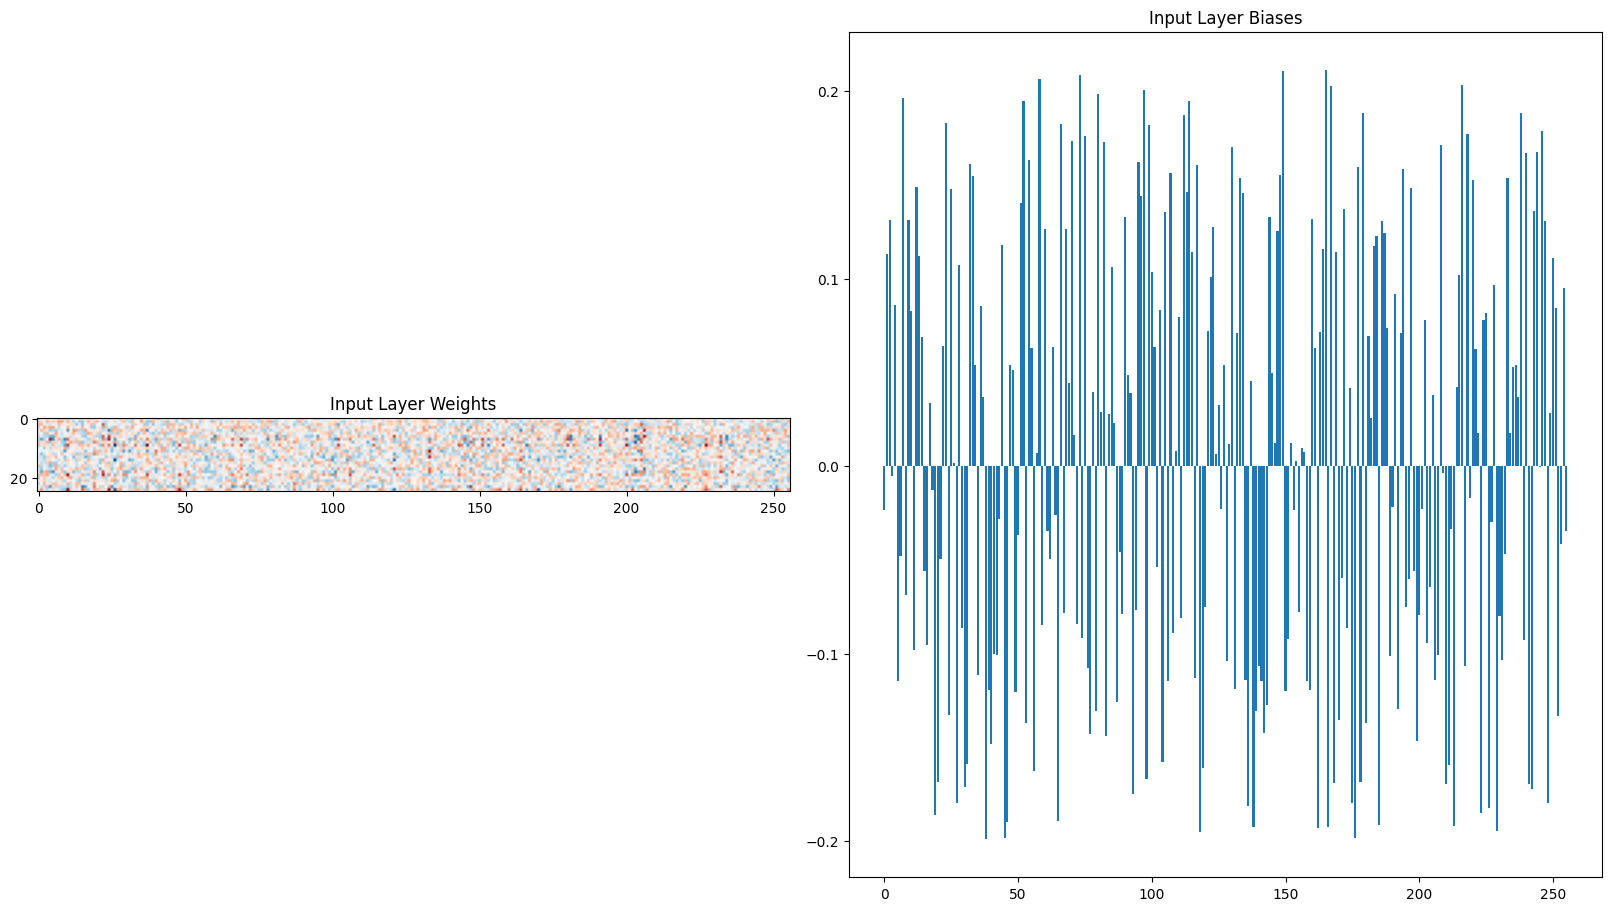

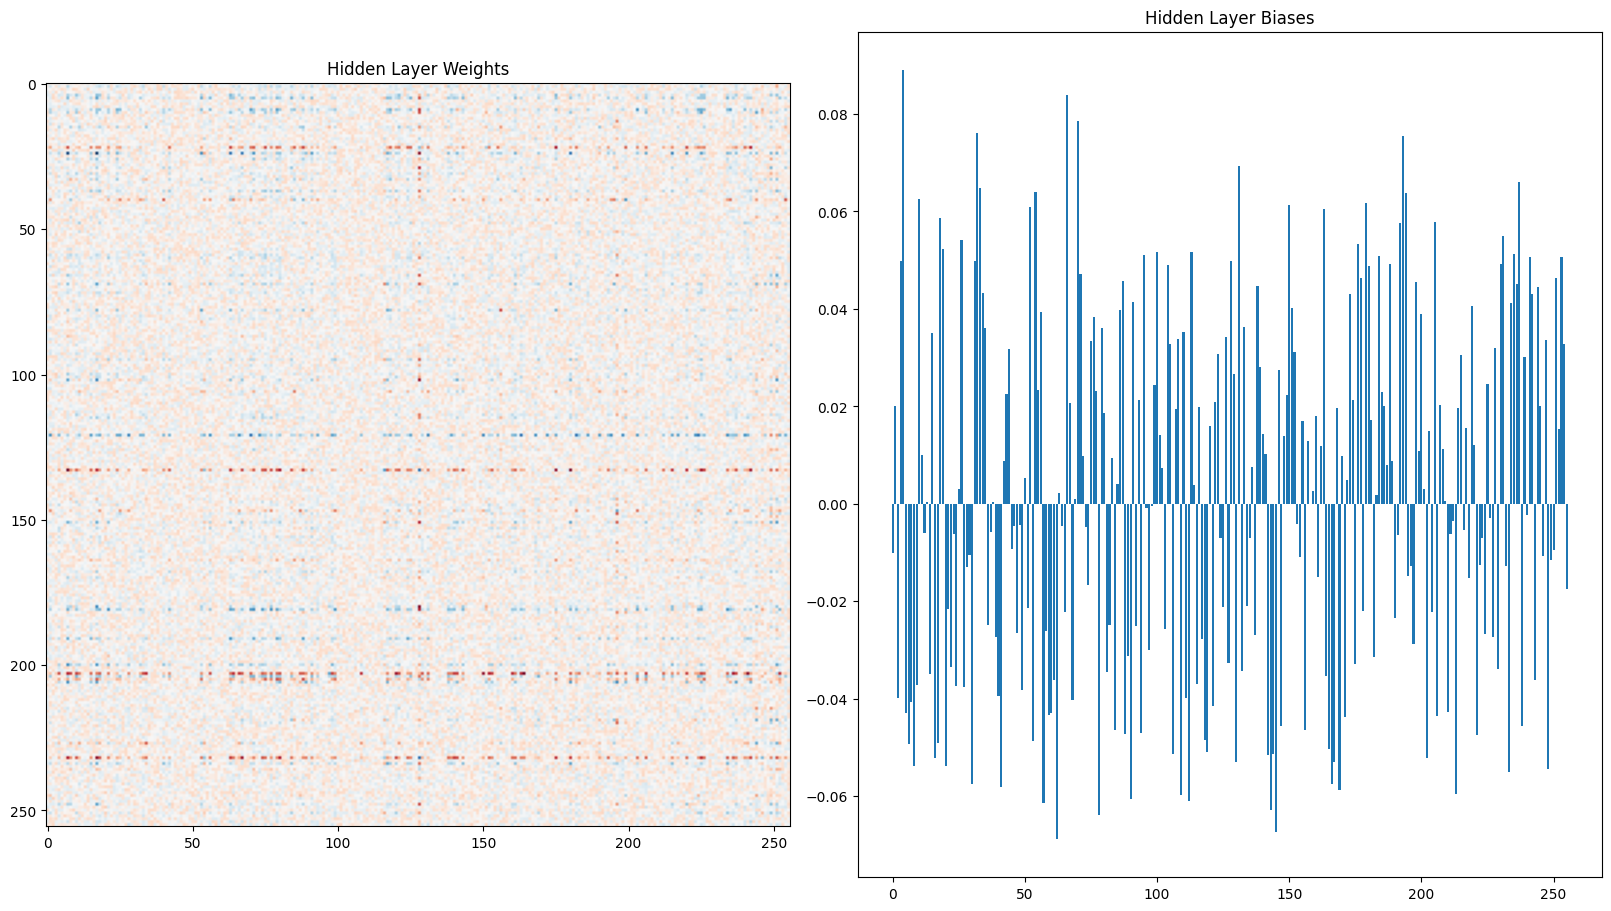

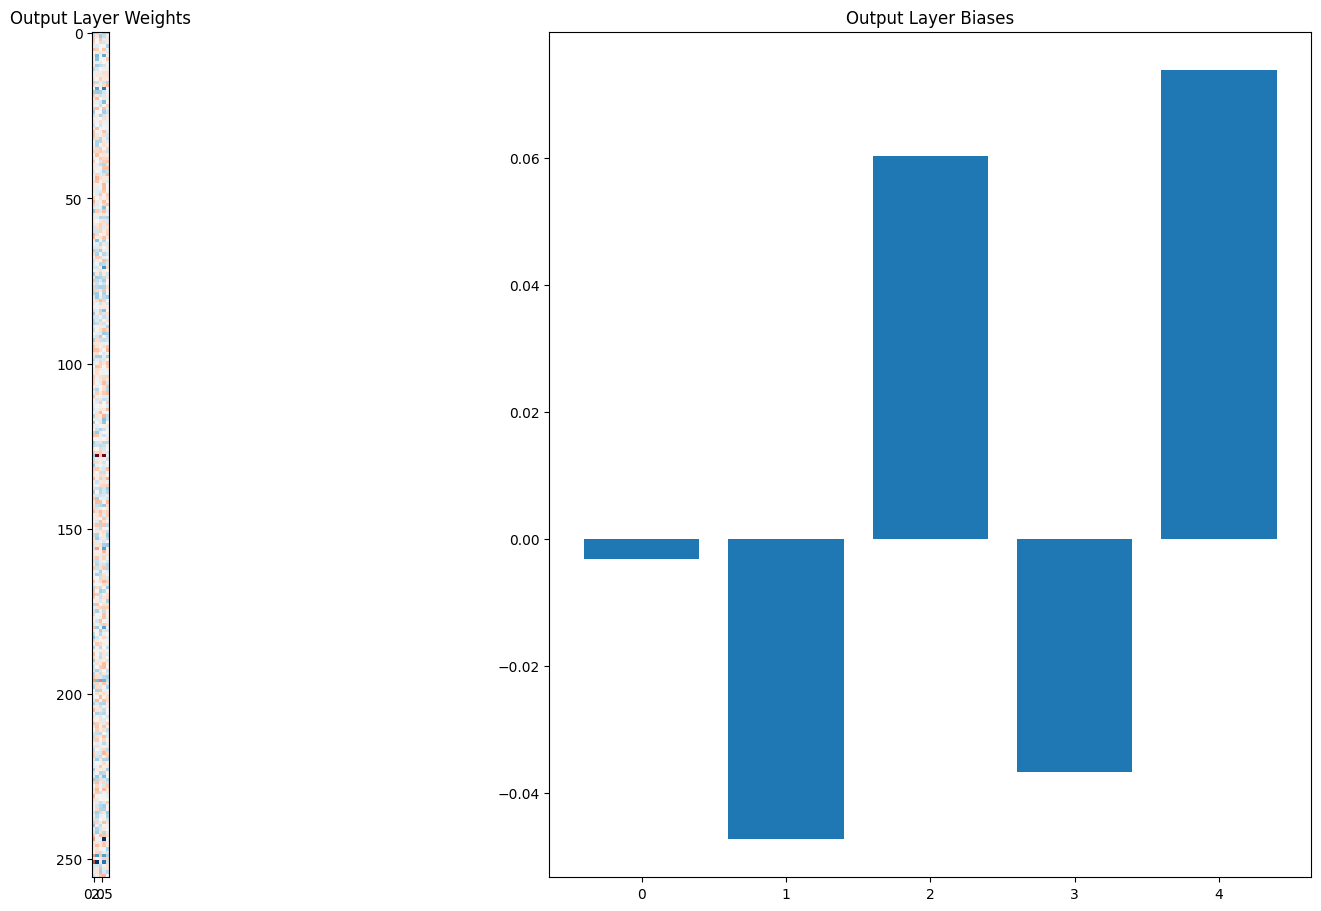

In [51]:
def analyze_layer(layern_name: str, module: torch.nn.Module):
    weights, biases = module.parameters() # model.q_net.q_net[2].parameters()
    wts = weights.T.detach().numpy()
    bs = biases.detach().numpy()
    
    fig = plt.figure(figsize=(16,9), layout="constrained")
    ax = fig.subplots(ncols=2)
    ax[0].set_title(f"{layern_name} Layer Weights")
    ax[0].imshow(wts, cmap="RdBu")
    
    ax[1].set_title(f"{layern_name} Layer Biases")
    ax[1].bar(range(len(bs)), bs)
    
    plt.show()

analyze_layer("Input", model.q_net.q_net[0])
analyze_layer("Hidden", model.q_net.q_net[2])
analyze_layer("Output", model.q_net.q_net[4])